In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Create a bootstrapped sample

### Using numpy.random.choice try to create a couple bootstrapped samples

In [2]:
np.random.choice(range(30), 10)

array([16, 17,  9, 21, 26, 20, 28, 24, 20,  6])

# Create Simulated Data Set

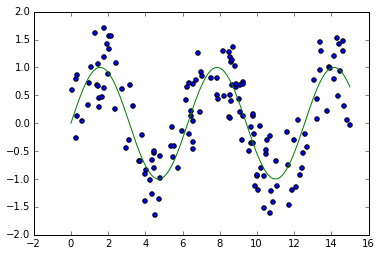

In [3]:
np.random.seed(0)

T_x = np.linspace(0, 15, 1000)[:, np.newaxis]
T_y = np.sin(T_x).ravel()

X = np.sort(15 * np.random.rand(150, 1), axis=0)
y = np.sin(X).ravel()

# Add noise to targets
y += 1.5 * (0.5 - np.random.rand(150))

plt.plot(T_x,T_y,c='g')
plt.scatter(X,y)

# Fit a Decision Tree

### Fit a Decision Tree Regressor on the above data
### Plot the predicted values and the true values on the same graph

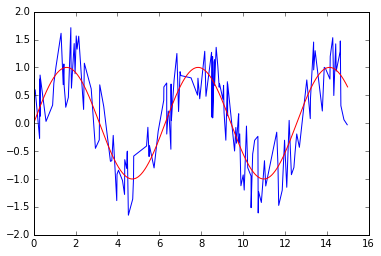

In [4]:
from sklearn.tree import DecisionTreeRegressor
rgr = DecisionTreeRegressor()
rgr.fit(X,y)
plt.plot(X, rgr.predict(X))
plt.plot(T_x,T_y,c='r')

# Create a Bootstrapped Sample

### Take a bootstrapped sample of the above data and fit a decision tree on it
### Plot the predicted values on the entire data set along with the true values

In [5]:
np.random.choice(range(len(X)), len(X))

array([ 91,  43,  63, 148,   9,  91, 111,  83,  76,  18, 113,  74, 131,
       140,  58, 129, 113, 128,  39,  24,  36,  99,  69, 134,   3, 121,
        28,  68,  26, 109, 135, 125,  94,  72,  84, 135, 108,  67, 102,
        84,  71,  83,   0, 133,  91, 107,   7, 149, 136,  46,   0, 104,
        38,  89,  74, 123,  87,  96,  83,  26,  32, 115,  97,  59,  57,
       132,  93,  91, 145, 148, 119, 105,   4, 109,  87,  73,  26, 118,
        22,  98,  90,  51,  46,  61,  47, 104, 128, 138, 141,  71,  94,
         6,  15,  53,  82, 135,  65,  66, 114,  92,  78, 100,  93, 114,
        12,  80,  66, 125, 138, 112, 120,  65,  88,  34,   3,  88,  70,
       148, 134,  28, 115, 134,  66,  92, 102, 101, 123, 109,  73, 100,
        77, 149,  81,  35, 136,  25,  21, 144, 119, 127, 129, 133, 140,
        90,  74,  78,  62,  72,  45, 133])

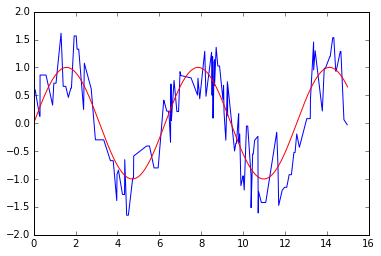

In [4]:
from sklearn.tree import DecisionTreeRegressor

index = np.random.choice(range(len(X)), len(X))
rgr = DecisionTreeRegressor()
rgr.fit(X[index],y[index])
plt.plot(X, rgr.predict(X))
plt.plot(T_x,T_y,c='r')

### Split the data set into a training and test set

In [10]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Do the following
 
* Fit a decision tree on the training set and predict on the test set. What is the MSE?
* Perform bagging with 100 trees on the training set. What is the MSE? You have two options:
    1. Try and implement bagging yourself. Still use the Decision Tree Regressor
    2. Use sklearns implementation (sklearn.ensemble.BaggingRegressor)

In [91]:
from sklearn.tree import DecisionTreeRegressor

def bagging(X, y, n = 20):
    estimators = []
    for i in range(n):
        index = np.random.choice(range(len(X)), len(X))
        estimators.append(DecisionTreeRegressor().fit(X[index],y[index]))
    return estimators

def predict_bagging(est, X):
    import numpy as np
    values = []
    for rgr in est:
        values.append(rgr.predict(X))
    return np.array(values)

def average_bags(bags):
    values = []
    for i in range(bags.shape[1]):
        values.append(sum(bags[:,i])/len(bags[:,i]))
    return values


#plt.plot(X, rgr.predict(X))
#plt.plot(T_x,T_y,c='r')

In [92]:
from sklearn.ensemble import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
rgr = DecisionTreeRegressor()
rgr.fit(X_train,y_train)
DT_pred = rgr.predict(X_test)

bag_pred = average_bags(predict_bagging(bagging(X_train,y_train, 100), X_test))

In [100]:
print("DT MSE: {}".format(mean_squared_error(y_test, DT_pred)))
print("Bagged MSE: {}".format(mean_squared_error(y_test, bag_pred)))

DT MSE: 0.387811091744
Bagged MSE: 0.27550487936


In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor
bg_rgr = BaggingRegressor()
bg_rgr.fit(X_train,y_train)
bg_pred = bg_rgr.predict(X_test)
mean_squared_error(y_test, bg_pred)

0.30420301914849962

In [13]:
from sklearn.ensemble import BaggingRegressor
x_axis = []
y_axis = []
for i in range(10,1000,10):
    pred = BaggingRegressor(n_estimators = i).fit(X_train,y_train).predict(X_test)
    y_axis.append(mean_squared_error(y_test, pred))
    x_axis.append(i)

10
20
30
40
50
60
70
80
90


### Create a bagging estimator where there is one estimator for every number of trees from 10 to 1000 going by 10 and trained on the training set. Plot the MSE of the test set as a function of the number of trees.

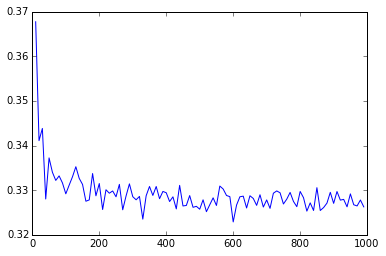

In [25]:
x_axis = []
y_axis = []
for i in range(10, 1000, 10):
    p = BaggingRegressor(n_estimators=i).fit(X_train,y_train).predict(X_test)
    y_axis.append(mean_squared_error(y_test, p))
    x_axis.append(i)
plt.plot(x_axis, y_axis)

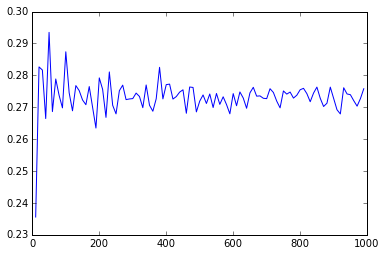

In [107]:
x_axis = []
y_axis = []
for i in range(10, 1000, 10):
    p = average_bags(predict_bagging(bagging(X_train,y_train, i), X_test))
    y_axis.append(mean_squared_error(y_test, p))
    x_axis.append(i)
plt.plot(x_axis, y_axis)

### Wine Quality

In [56]:
wine_quality = pd.read_csv('../Datasets/winequality-red.csv', sep=';')

In [57]:
wine_quality.shape

(1599, 12)

In [58]:
y = wine_quality['quality']
X = wine_quality[['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 1)

In [72]:
from sklearn.ensemble import RandomForestClassifier
rgr = RandomForestClassifier(random_state= 1)
rgr.fit(X_train, y_train)
y_pred = rgr.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score 

print(1.0*sum(y_pred==y_test)/len(y_pred))
print(accuracy_score(y_test, y_pred))

0.66
0.66


In [74]:
from sklearn.linear_model import LogisticRegression
lr_rgr = LogisticRegression(random_state= 1)
lr_rgr.fit(X_train, y_train)
y_pred_lr = lr_rgr.predict(X_test)

In [77]:
print(1.0*sum(y_pred_lr==y_test)/len(y_pred_lr))
print(accuracy_score(y_test, y_pred_lr))

0.5925
0.5925
